In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, binarize
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# SMOTE
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot

#KNN Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#decision trees Imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.externals.six import StringIO

#Random Forest Imports
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
hr_data = pd.read_csv('datafiles/hrdata_cleaned',index_col=0)

In [3]:
df_target = hr_data['performance_score_Exceptional']+hr_data['performance_score_Exceeds']
df_feats = hr_data.drop(columns=['performance_score_Exceeds','performance_score_Exceptional','performance_score_Fully Meets','performance_score_N/A- too early to review','performance_score_Needs Improvement','performance_score_PIP'])


# Train Test Split

In [4]:
#creating matrix of features 
X = df_feats.drop(columns=['name'])
#assigning target variable 
y = df_target
#creating a list of features
feature_cols = X.columns

In [5]:
y.value_counts()

0    263
1     37
dtype: int64

In [6]:
# Use x and y variables to split the training data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40,random_state=42)

1. Logistic Regression

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [9]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.8583333333333333


In [10]:
y_test.value_counts()

0    107
1     13
dtype: int64

In [11]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[102   5]
 [ 12   1]]


In [12]:
#pip install imbalanced-learn

In [13]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 263, 1: 263})


In [14]:
# Use x and y variables to split the training data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40,random_state=42)

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
print('Accuracy_Score--------')
print(metrics.accuracy_score(y_test, y_pred_class))
print('\n')
print('Value_Counts--------')
print(y_test.value_counts())

Accuracy_Score--------
0.8625592417061612


Value_Counts--------
1    111
0    100
dtype: int64


**Confusion matrix**

In [17]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[89 11]
 [18 93]]


# 1. Is there any relationship between who a person works for and their performance score?
- Correlation between manager and performance score 

In [18]:
hr_data = hr_data.set_index('name')

In [22]:
data = pd.read_csv('datafiles/HR_dataset.csv')

In [23]:
data = data.set_index('Employee Name')
data = pd.get_dummies(data, columns = ['Performance Score'])
data

,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,...,Pay Rate,Manager Name,Employee Source,Performance Score_90-day meets,Performance Score_Exceeds,Performance Score_Exceptional,Performance Score_Fully Meets,Performance Score_N/A- too early to review,Performance Score_Needs Improvement,Performance Score_PIP
Employee Name,,,,,,,,,,,,,,,,,,,,,
"Brown, Mia",1.103024e+09,MA,1450.0,11/24/85,32.0,Female,Married,US Citizen,No,Black or African American,...,28.50,Brandon R. LeBlanc,Diversity Job Fair,0,0,0,1,0,0,0
"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/84,33.0,Male,Divorced,US Citizen,No,Black or African American,...,23.00,Brandon R. LeBlanc,Website Banner Ads,0,0,0,1,0,0,0
"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/86,31.0,Male,Single,US Citizen,No,White,...,29.00,Brandon R. LeBlanc,Internet Search,0,0,0,1,0,0,0
"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/85,32.0,Female,Married,US Citizen,No,White,...,21.50,Brandon R. LeBlanc,Pay Per Click - Google,0,0,0,0,1,0,0
"Singh, Nan",1.307060e+09,MA,2330.0,5/19/88,29.0,Female,Single,US Citizen,No,White,...,16.56,Brandon R. LeBlanc,Website Banner Ads,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Saada, Adell",1.012023e+09,MA,2132.0,7/24/86,31.0,Female,Married,US Citizen,No,White,...,49.25,Alex Sweetwater,Pay Per Click - Google,0,0,0,1,0,0,0
"Szabo, Andrew",1.201031e+09,MA,2140.0,5/6/83,34.0,Male,Single,US Citizen,No,White,...,48.00,Alex Sweetwater,MBTA ads,0,0,1,0,0,0,0
"True, Edward",1.102024e+09,MA,2451.0,6/14/83,34.0,Male,Single,Non-Citizen,No,Black or African American,...,45.42,Alex Sweetwater,Diversity Job Fair,0,0,0,1,0,0,0


In [25]:
list(data.columns)

['Employee Number',
 'State',
 'Zip',
 'DOB',
 'Age',
 'Sex',
 'MaritalDesc',
 'CitizenDesc',
 'Hispanic/Latino',
 'RaceDesc',
 'Date of Hire',
 'Date of Termination',
 'Reason For Term',
 'Employment Status',
 'Department',
 'Position',
 'Pay Rate',
 'Manager Name',
 'Employee Source',
 'Performance Score_90-day meets',
 'Performance Score_Exceeds',
 'Performance Score_Exceptional',
 'Performance Score_Fully Meets',
 'Performance Score_N/A- too early to review',
 'Performance Score_Needs Improvement',
 'Performance Score_PIP']

# Heatmap

In [419]:
full_df = pd.read_csv('datafiles/HR_dataset.csv', index_col=0)
perf_score = pd.DataFrame(full_df['Performance Score'])
manager_list = pd.DataFrame(full_df['Manager Name'])
manager_performances = pd.concat([perf_score,manager_list], axis=1)

In [420]:
manager_performances.columns=['performance','manager']

In [421]:
manager_performances['manager'].value_counts()

Kissy Sullivan        22
Kelley Spirea         22
Michael Albert        22
Elijiah Gray          22
Amy Dunn              21
Webster Butler        21
Brannon Miller        21
David Stanley         21
Ketsia Liebig         21
Janet King            19
Simon Roup            17
Peter Monroe          14
John Smith            14
Lynn Daneault         13
Alex Sweetwater        9
Brandon R. LeBlanc     7
Jennifer Zamora        6
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: manager, dtype: int64

In [422]:
df1 = pd.get_dummies(manager_performances, columns = ['manager'], drop_first=True )
#Alex Sweetwater was dropped 

In [424]:
# df1 = df1.groupby('performance')

In [425]:
df1_corr = df1.corr()
df1_corr = df1_corr.fillna(0)

In [426]:
df1['performance'].unique()

array(['Fully Meets', 'N/A- too early to review', '90-day meets',
       'Exceptional', 'Needs Improvement', 'Exceeds', 'PIP', nan],
      dtype=object)

In [427]:
df1['performance'] = df1['performance'].replace(['Fully Meets',
                                                 'N/A- too early to review',
                                                 '90-day meets','Exceptional', 
                                                 'Needs Improvement',
                                                 'Exceeds', 
                                                 'PIP'],
                                                ['fully_meets','too_early',
                                                'ninety_day', 'exceptional',
                                                'needs_improvement',
                                                 'exceeds',
                                                'pip'])
# df1['performance'] = df1['performance'].replace('Fully Meets','fully_meets')

In [428]:
df1

,performance,manager_Amy Dunn,manager_Board of Directors,manager_Brandon R. LeBlanc,manager_Brannon Miller,manager_David Stanley,manager_Debra Houlihan,manager_Elijiah Gray,manager_Eric Dougall,manager_Janet King,manager_Jennifer Zamora,manager_John Smith,manager_Kelley Spirea,manager_Ketsia Liebig,manager_Kissy Sullivan,manager_Lynn Daneault,manager_Michael Albert,manager_Peter Monroe,manager_Simon Roup,manager_Webster Butler
Employee Name,,,,,,,,,,,,,,,,,,,,
"Brown, Mia",fully_meets,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"LaRotonda, William",fully_meets,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Steans, Tyrone",fully_meets,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Howard, Estelle",too_early,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Singh, Nan",too_early,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Saada, Adell",fully_meets,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Szabo, Andrew",exceptional,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"True, Edward",fully_meets,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [429]:
df1 = pd.get_dummies(df1, columns = ['performance'], drop_first=True )
#exceeds was dropped 

In [443]:
df_corr = df1.corr()

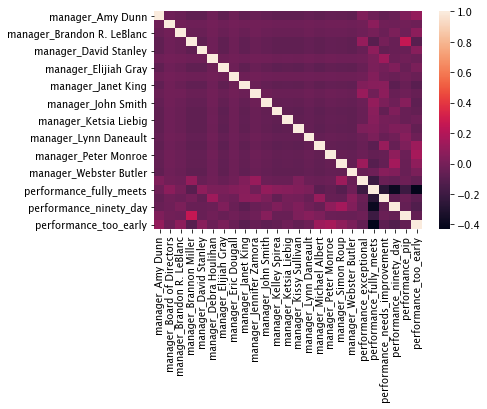

In [462]:
sns.heatmap(df_corr)

**Variance** - measure of dispersion of continuous random variables from its expected mean value

**Covariance** - when trying to figure out how two random variables vary together
- A **positive** covariance indicates that two variables are positively related
- A **negative** covariance indicates that two variables are inversely related
- A covariance **equal or close to 0** indicates that there is no linear relationship between two variables

**Correlation** is calculated by standardizing covariance by some measure of variability in the data, it produces a quantity that has intuitive interpretations and consistent scale.
- **Pearson Correlation Coefficient**,  𝑟 , also called the linear correlation coefficient, measures the strength and the direction of a linear relationship between two variables. This coefficient quantifies the degree to which a relationship between two variables can be described by a line.


**1. Mean normalized**

In [37]:
# Write a function to take in an iterable, calculate the mean and subtract the mean value
# from each element, creating and returning a new list. 
def mean_normalize(var):
    norm = [] # Vector for storing output values 
    mean = sum(var)/len(var)   
    for i in var: # for each element in the vector, subtract from mean and add the result to norm
        diff = i - mean
        norm.append(diff)
    return norm

Text(0.5, 1.0, 'Age Normalized')

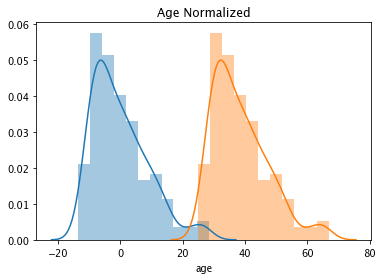

In [58]:
age_normalized = mean_normalize(hr_data['age'])
# Visualize the age data distribution before and after mean normalization 
sns.distplot(age_normalized)
sns.distplot(hr_data['age'])
plt.title('Age Normalized')

- Notice the shape of the data isn't changed, but the mean is just shifted (normalization process)

Text(0.5, 1.0, 'Pay Rate Normalized')

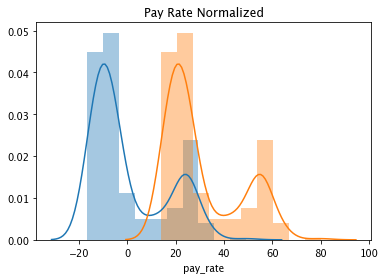

In [44]:
pay_normalized = mean_normalize(hr_data['pay_rate'])
# Visualize the PAY data distribution before and after mean normalization 
sns.distplot(pay_normalized)
sns.distplot(hr_data['pay_rate'])
plt.title('Pay Rate Normalized')

In [46]:
# FUNCTION: dot product of two iterables 
def dot_product(x, y):
    prod_vec = 0 # Initliaze an empty list to store the results 
    # For all elements in the vectors, multiply and save results in prod_vec
    for i in range(len(x)):
        prod = x[i]* y[i]
        prod_vec += prod
    return prod_vec

In [47]:
def covariance(var1, var2):
    # Formula for covariance is:
    # [Sum (x_i - X)(y_i - Y)] / N-1 
    # Sanity Check: Check to see if both vectors are of same length
    # Exit the function if variables have different lengths
    if len(var1) != len(var2):
        return 'The lengths of both the lists should be equal.' 
    else: 
        # Mean normalize both variables 
        x = mean_normalize(var1)
        y = mean_normalize(var2)
        # Take the dot product of mean normalized variables
        result = dot_product(x, y)
        # divide the dot product by n-1    
        return result /((len(var1)) - 1)

In [52]:
covariance(age_normalized,pay_normalized)

2.448728205128202

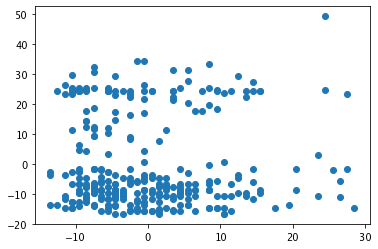

In [53]:
plt.scatter(age_normalized,pay_normalized)

- you can see that there is no relationship between age and pay 

In [59]:
# Calculate Correlation between two variables using formula above
import math
def correlation(var1, var2):  
    if len(var1) != len(var2):
        return 'The lengths of both the lists should be equal.' 
    else: 
       
        mean_norm_var1 = mean_normalize(var1)
        mean_norm_var2 = mean_normalize(var2)
        var1_dot_var2 = dot_product(mean_norm_var1, mean_norm_var2)
        var1_squared = [i * i for i in mean_norm_var1]
        var2_squared = [i * i for i in mean_norm_var2]
        return round(var1_dot_var2 / math.sqrt(sum(var1_squared) * sum(var2_squared)), 2)

correlation(age_normalized,pay_normalized)

0.02

In [79]:
# Check - LOW CORRELATION BETWEEN AGE AND PAY

pay = hr_data['pay_rate']
age = hr_data['age']
pay_age = pd.concat([pay,age], axis = 1)
pay_age.corr()

,pay_rate,age
pay_rate,1.000000,0.017995
age,0.017995,1.000000


# Multicolinearity

In [26]:
x_cols = data.columns

In [27]:
x_cols

Index(['Employee Number', 'State', 'Zip', 'DOB', 'Age', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'Hispanic/Latino', 'RaceDesc', 'Date of Hire',
       'Date of Termination', 'Reason For Term', 'Employment Status',
       'Department', 'Position', 'Pay Rate', 'Manager Name', 'Employee Source',
       'Performance Score_90-day meets', 'Performance Score_Exceeds',
       'Performance Score_Exceptional', 'Performance Score_Fully Meets',
       'Performance Score_N/A- too early to review',
       'Performance Score_Needs Improvement', 'Performance Score_PIP'],
      dtype='object')

In [ ]:
X = data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))